In [9]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt
import random

## Task 2

In [10]:
# Compute the best strategy to schedule the use of the appliances
off_peak_hours = range(0-16) and range(21-24)
peak_hours = range(17-20)

# Coefficient for the constraints
appliances = {
    # Non-shiftable appliances
    "lightning": {"power": 1.5, "hours": range(10, 21)},
    "refrigerator": {"power": 2, "hours": range(0, 24)},
    "TV": {"power": 0.6, "hours": range(0, 24)},
    "electric_stove": {"power": 3.9, "hours": range(0, 24)},

    # Shiftable appliances
    "dishwasher": {"power": 1.44, "hours": range(24)},
    "laundry_machine": {"power": 1.94, "hours": range(24)},
    "cloth_dryer": {"power": 2.50, "hours": range(24)},
    "toaster": {"power": 0.24, "hours": range(24)}
}

In [11]:
# Real-Time Pricing (RTP) scheme: using a random function to generate the pricing curve in a day
def generate_pricing_curve():
    random.seed(6)
    pricing_curve = []
    for i in range(24):
        if i in peak_hours:
            # higher price in the peak hours
            pricing_curve.append(random.uniform(1, 1.5))
        else:
            # lower price in the off-peak hours
            pricing_curve.append(random.uniform(0.5, 1))
    return pricing_curve

price = generate_pricing_curve()
print(price)

[0.8966700418808315, 0.9109770211598633, 0.7425173139654726, 0.630810741472329, 0.5002258574425356, 0.8314092814418839, 0.7351271285322225, 0.8798653175489466, 0.6865801860369207, 0.8850699179689951, 0.6363490428359854, 0.9009577415813018, 0.864912416311008, 0.7070032205826517, 0.7691526097776384, 0.8410258706443392, 0.5964924378820438, 0.7768075827491421, 0.9025620249244866, 0.632760527219251, 0.9016826548056567, 0.8428449410502205, 0.9221411623980824, 0.6677910089129071]


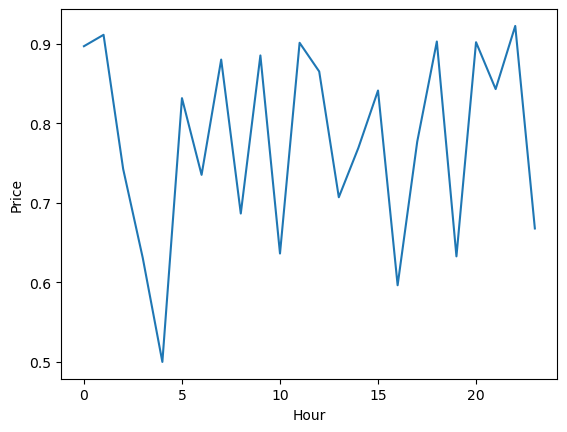

In [12]:
# A figure showcasing the pricing curve
plt.figure()
plt.plot(price)
plt.xlabel("Hour")
plt.ylabel("Price")
plt.show()

In [35]:
# Write a program in order to minimize energy cost

# Define coefficients for the constraints (power requirements)
A_eq = []
b_eq = []

for appliance in appliances.values():
    power_usage = []
    for hour in range(24):
        if hour in appliance["hours"]:
            power_usage.append(appliance["power"])
        else:
            power_usage.append(0)
    A_eq.append(power_usage)
    b_eq.append(sum(power_usage))

# Bounds for each variable (x_i)
bounds = [(0, None)] * 24

# Solve the linear programming problem
result = linprog(price, A_eq=A_eq, b_eq=b_eq, bounds=bounds)

if result.success:
    # Round the optimal energy consumption schedule
    optimal_schedule = np.round(result.x, decimals=7)
    total_cost = np.dot(price, optimal_schedule)
    
    # Print the result
    print("Optimal energy schedule:")
    print(optimal_schedule )
    print("Total cost:", round(result.fun, 10))
else:
    print("No solution found.")

Optimal energy schedule:
[ 0.  0.  0.  0. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 11.  0.
  0.  0.  0.  0.  0.  0.]
Total cost: 13.0643529635


## Task 3

In [47]:
# Each household has the same setting as that in question 2
households = appliances

# Real-Time Pricing (RTP) scheme
c = price

# Requirement: Small neighborhood that has 30 households, only a fraction of the households owns an EV. 
neighborhood = int(30)
household_withEV = (1/neighborhood)

# Household with EV
appliances_EV = {
    # Non-shiftable appliances
    "lightning": {"power": 1.5, "hours": range(10, 21)},
    "refrigerator": {"power": 2, "hours": range(0, 24)},
    "TV": {"power": 0.6, "hours": range(0, 24)},
    "electric_stove": {"power": 3.9, "hours": range(0, 24)},

    # Shiftable appliances
    "dishwasher": {"power": 1.44, "hours": range(24)},
    "laundry_machine": {"power": 1.94, "hours": range(24)},
    "cloth_dryer": {"power": 2.50, "hours": range(24)},
    "toaster": {"power": 0.24, "hours": range(24)},
    "electric_vehicle": {"power": 9.9, "hours": range(24)}
}

In [48]:
# Write a program in order to minimize energy cost in the neighborhood. 
EV_A_eq = []
EV_b_eq = []

for household in range(neighborhood):
    # Household with EV
    if random.random() < household_withEV:
        for appliance in appliances_EV.values():
            power_usage = []
            for hour in range(24):
                if hour in appliance["hours"]:
                    power_usage.append(appliance["power"])
                else:
                    power_usage.append(0)
            EV_A_eq.append(power_usage)
            EV_b_eq.append(sum(power_usage))
    
    # Household without EV
    else:
        for appliance in appliances.values():
            power_usage = []
            for hour in range(24):
                if hour in appliance["hours"]:
                    power_usage.append(appliance["power"])
                else:
                    power_usage.append(0)
            EV_A_eq.append(power_usage)
            EV_b_eq.append(sum(power_usage))


# Combine the constraint arrays for EV and non-EV households
fraction_EV = int(np.round(household_withEV*100))

# Bounds for each variable (x_i)
EV_bounds = [(0, None)] * 24

# Solve the linear programming problem
result_EV = linprog(c, A_eq=EV_A_eq, b_eq=EV_b_eq, bounds=EV_bounds) 

if result_EV.success:
    # Round the optimal energy consumption schedule
    optimal_schedule_EV = np.round(result.x, decimals=7)
    total_cost = np.dot(price, optimal_schedule_EV)
    
    # Print the result
    print("Optimal energy schedule:")
    print(optimal_schedule_EV)
    print("Total cost:", round(result_EV.fun, 10))
else:
    print("No solution found.")

Optimal energy schedule:
[ 0.  0.  0.  0. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 11.  0.
  0.  0.  0.  0.  0.  0.]
Total cost: 13.0643529635


## Task 4

In [16]:
"""
We may observe that in some timeslots, energy consumption is very high. 
Then, the objective function should consider both energy cost and the peak load. 

if (total energy consumption of all appliances) > peak load:
    add_constraints
"""
peak_load = 0

# Each household has the same setting as that in question 2

# Real-Time Pricing (RTP) scheme
c = price

In [49]:
# Please formulate an optimization problem and compute the best strategy to schedule the use of the appliances.

# Coefficient matrix of the equality constraints
A_eq = []
for i in range(4):
    row = [1 if i * 24 <= j < i * 24 + 24 else 0 for j in range(96)]
    A_eq.append(row)

# Right-hand side of the equality constraints
b_eq = [1.44, 1.94, 2.5, 9.9]

# Coefficient matrix of the inequality constraints
A_ub = []  
identity_matrix = np.eye(24)
for i in range(24):
    row = np.tile(identity_matrix[i], 4)
    A_ub.append(row.tolist())

# Right-hand side of the inequality constraints
hour_power_cap_vector = np.full(24, 7)  # in kWh
k = np.array([0.77 for _ in range(24)])  # hourly power usage for all non-shiftable appliances
b_ub = hour_power_cap_vector - k  

# Bounds for each decision variable
bounds = [(0, None) for _ in range(96)]  # Non-negative bounds for all variables

# Objective function coefficients
c = [00.8966700418808315, 0.9109770211598633, 0.7425173139654726, 0.630810741472329, 0.5002258574425356, 0.8314092814418839, 0.7351271285322225, 0.8798653175489466, 0.6865801860369207, 0.8850699179689951, 0.6363490428359854, 0.9009577415813018, 0.864912416311008, 0.7070032205826517, 0.7691526097776384, 0.8410258706443392, 0.5964924378820438, 0.7768075827491421, 0.9025620249244866, 0.632760527219251, 0.9016826548056567, 0.8428449410502205, 0.9221411623980824, 0.6677910089129071] * 4

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Check if the optimization was successful
if result.success:
    optimal_solution = result.x
    optimal_value = result.fun
    print("Optimal Solution:", optimal_solution)
    print("Optimal Value of Objective Function:", optimal_value)
else:
    print("Optimization failed. Message:", result.message)

Optimal Solution: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   1.44 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 1.94 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   2.5  0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   3.32 4.29 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   2.29 0.   0.   0.   0.   0.   0.   0.  ]
Optimal Value of Objective Function: 8.926846641560264
